In [49]:
import pandas as pd
import pytz
from datetime import datetime
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [38]:
df = pd.read_csv('all_latest_records_dynamodb.csv')
df.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories
61,youtube#video,loLje0kEOr8OAiiupm0UOC0PAkk,cgh358BMAGc,2019-02-13T14:31:02Z,UC8STtt_887rI15P1RJ4Ng7w,✨Goddess Glo Up Subliminal ✨Become a Goddess ...,"Since their are too many affirmations, I am po...",https://i.ytimg.com/vi/cgh358BMAGc/hqdefault.jpg,480,360,elixir subliminals,none,2019-02-13T14:31:02Z,cgh358BMAGc,PT6M7S,2d,hd,False,False,rectangular,processed,public,youtube,True,True,False,9903717,140972.0,0,31905.0,"['https://en.wikipedia.org/wiki/Music', 'https..."
152,youtube#video,vnRBr2x94Z89DXbWlYAc7f6M7nc,vnN9daIggSE,2024-02-29T00:00:27Z,UCziur-9RwTjgwNyVvia1OyQ,Increase Your Self-esteem by Listening to Posi...,ENJOY = LIKE & SUBSCRIBE: https://www.youtube....,https://i.ytimg.com/vi/vnN9daIggSE/hqdefault.jpg,480,360,Positive Affirmations for a Better YOU!,none,2024-02-29T00:00:27Z,vnN9daIggSE,PT11M,2d,hd,False,False,rectangular,processed,public,youtube,True,True,False,33,7.0,0,0.0,['https://en.wikipedia.org/wiki/Health']


In [39]:
def calculate_published_age(df):
    df['publishTime'] = pd.to_datetime(df['publishTime']).dt.tz_convert('UTC')  # Convert publishTime to UTC timezone
    current_time = datetime.now(pytz.utc)  # Get current datetime in UTC
    df['PublishedAgeMin'] = (current_time - df['publishTime']).dt.total_seconds() / 60  # Calculate time difference in minutes
    df['PublishedAgeMin'] = df['PublishedAgeMin'].astype(int)  # Convert to integer to display actual minutes

# Call the function with your DataFrame 'df'
calculate_published_age(df)
df.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories,PublishedAgeMin
477,youtube#video,Ag7XDyOQVc25zPu094immtwE_PA,QJy3VPGRlSo,2022-02-03T14:00:16Z,UC5kZolaP7z05dUclcEm1E9g,TAKE ACTION Now Affirmations | Destroy Procras...,Join Our Discord Network: The Kings Club | htt...,https://i.ytimg.com/vi/QJy3VPGRlSo/hqdefault.jpg,480,360,CREATING KINGS™,none,2022-02-03 14:00:16+00:00,QJy3VPGRlSo,PT7M58S,2d,hd,False,True,rectangular,processed,public,youtube,True,True,False,32636,429.0,0,30.0,['https://en.wikipedia.org/wiki/Hip_hop_music'...,1090866
397,youtube#video,0xXdbB_Iixg01uP0C9PY8OhLDHk,ERVqVVBnMJs,2019-07-24T13:08:37Z,UC0TEw69VjhOUG0JMHTfSMVw,(George Benson) - Affirmation - guitar cover b...,Backingtrack - http://bobbysbackingtracks.com ...,https://i.ytimg.com/vi/ERVqVVBnMJs/hqdefault.jpg,480,360,Vinai T,none,2019-07-24 13:08:37+00:00,ERVqVVBnMJs,PT5M35S,2d,hd,False,True,rectangular,processed,public,youtube,True,True,False,207769,3648.0,0,121.0,"['https://en.wikipedia.org/wiki/Jazz', 'https:...",2422918


In [40]:

df['viewCountPerMin'] = df['viewCount'] / df['PublishedAgeMin'].astype(float)

df['likeCountPerMin'] = df['likeCount'] / df['PublishedAgeMin'].astype(float)

df['commentCountPerMin'] = df['commentCount'] / df['PublishedAgeMin'].astype(float)

df.sample(2)

,kind,etag,videoId,publishedAt,channelId,title,description,url,width,height,channelTitle,liveBroadcastContent,publishTime,id,duration,dimension,definition,caption,licensedContent,projection,uploadStatus,privacyStatus,license,embeddable,publicStatsViewable,madeForKids,viewCount,likeCount,favoriteCount,commentCount,topicCategories,PublishedAgeMin,viewCountPerMin,likeCountPerMin,commentCountPerMin
373,youtube#video,kWrsHY8bwbTs1GOsJIZua1KW6vM,8sRkpqsD_q4,2022-01-28T01:40:40Z,UCKFnBiPHyBRYJanS1d_w26w,10 Powerful Affirmations. आत्म विश्वास और उर्ज...,"10 ऊर्जावान, शक्तिशाली, Powerfull Affirmations...",https://i.ytimg.com/vi/8sRkpqsD_q4/hqdefault.jpg,480,360,Hum Jeetenge,none,2022-01-28 01:40:40+00:00,8sRkpqsD_q4,PT8M21S,2d,hd,False,True,rectangular,processed,public,youtube,True,False,False,627876,19803.0,0,362.0,['https://en.wikipedia.org/wiki/Religion'],1100246,0.570669,0.017999,0.000329
422,youtube#video,QSHm3SnfyZMdBCnciED3Qtk3U7M,efZFARmGyMs,2023-08-04T13:00:34Z,UC-ga3onzHSJFAGsIebtVeBg,Positive Affirmations to Change Your Life 🦋✨ 3...,Powerful positive affirmations to change your ...,https://i.ytimg.com/vi/efZFARmGyMs/hqdefault.jpg,480,360,Lavendaire,none,2023-08-04 13:00:34+00:00,efZFARmGyMs,PT16M35S,2d,hd,True,True,rectangular,processed,public,youtube,True,True,False,1385871,26264.0,0,582.0,['https://en.wikipedia.org/wiki/Lifestyle_(soc...,303246,4.570121,0.086610,0.001919


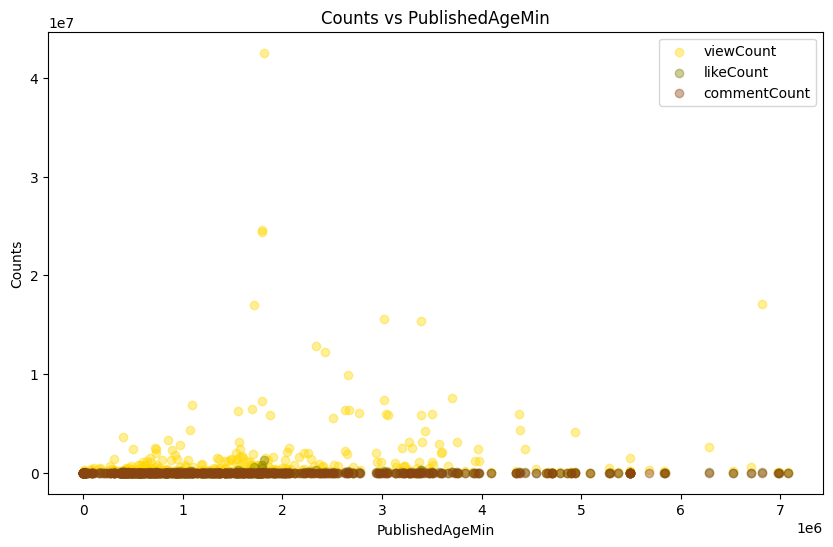

In [41]:
import matplotlib.pyplot as plt

# Define colors and opacities
colors = {'viewCount': 'gold', 'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Create the scatter plot
plt.figure(figsize=(10, 6))
for col in ['viewCount', 'likeCount', 'commentCount']:
    plt.scatter(df['PublishedAgeMin'], df[col], color=colors[col], alpha=opacities[col], label=col)

# Add labels and title
plt.xlabel('PublishedAgeMin')
plt.ylabel('Counts')
plt.title('Counts vs PublishedAgeMin')
plt.legend()

# Display the plot
plt.show()

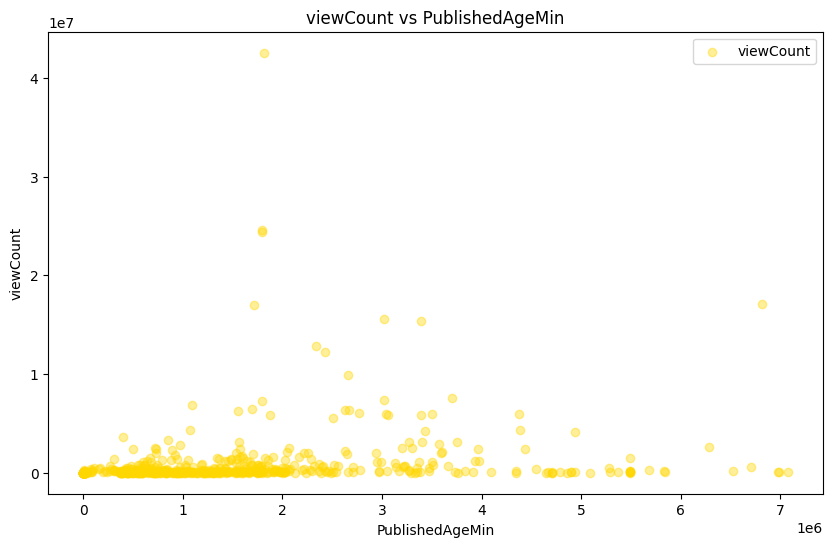

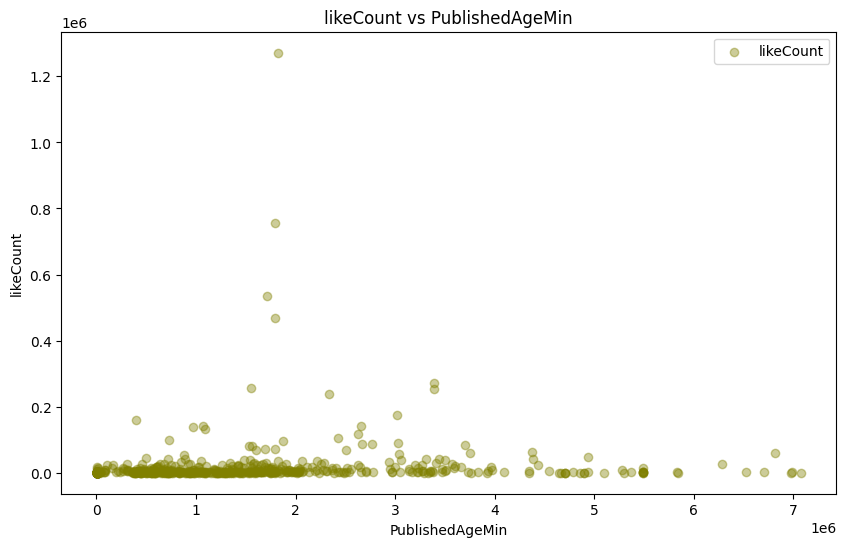

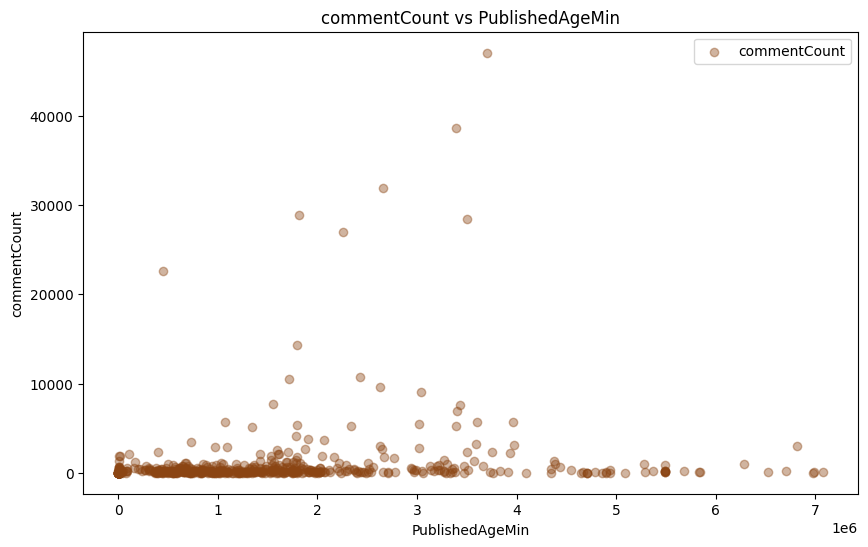

In [35]:
import matplotlib.pyplot as plt

# Define colors and opacities
colors = {'viewCount': 'gold', 'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Generate separate scatter plots for each metric
for col in ['viewCount', 'likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    plt.scatter(df['PublishedAgeMin'], df[col], color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')
    plt.legend()
    plt.show()


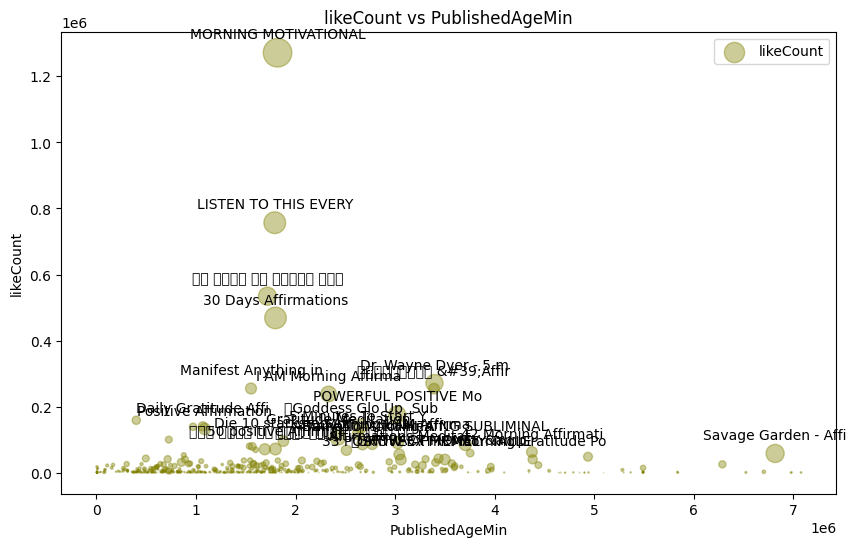

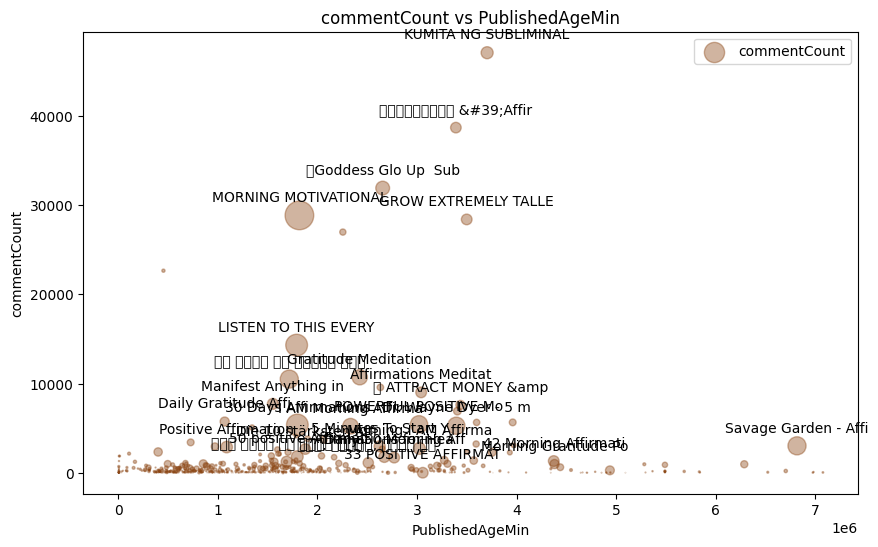

In [51]:

# Define colors and opacities
colors = {'viewCount': 'gold', 'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Generate separate scatter plots for likeCount and commentCount, varying size based on viewCount
for col in ['likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['PublishedAgeMin'], df[col], s=df['viewCount']/100000, color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')

    # Iterate through DataFrame rows for annotation
    for i, row in df.iterrows():
        if row['viewCount'] > view_count_threshold:
            plt.annotate(row['title'][:20], (row['PublishedAgeMin'], row[col]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.legend()
    plt.show()

/var/folders/d1/y25pd1w173v6d8g4wtl18r_r0000gn/T/ipykernel_75186/1949728497.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['commentCount'].fillna(0, inplace=True)


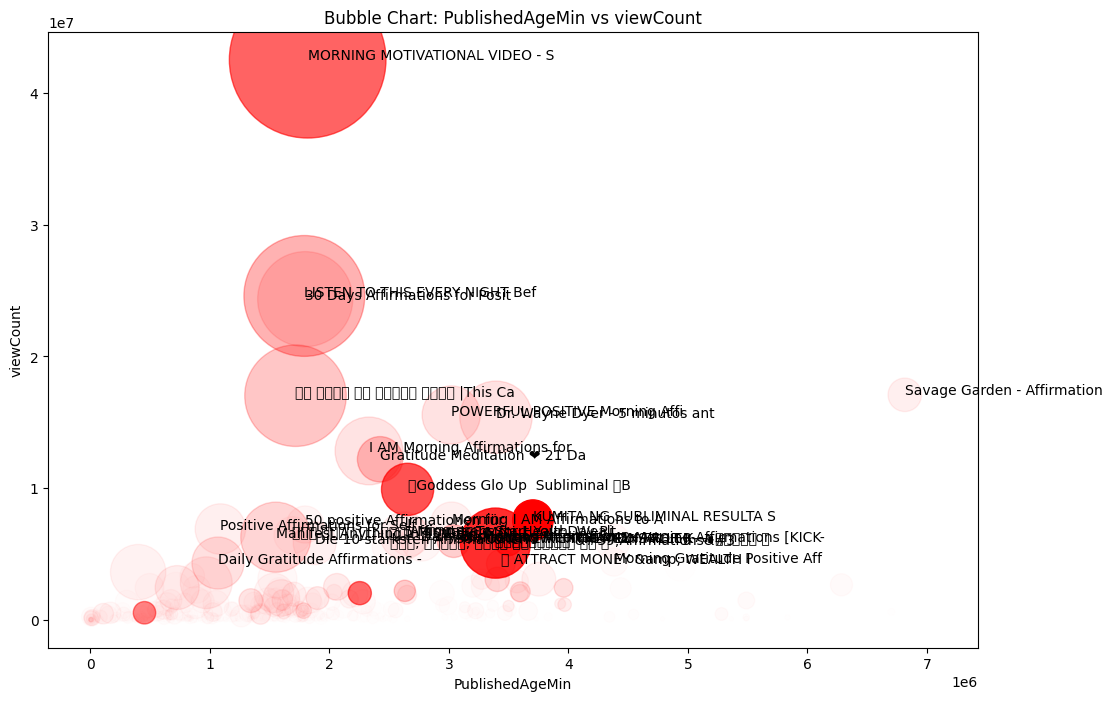

In [34]:
import matplotlib.pyplot as plt

# Fill NaN values in 'commentCount' column with 0
df['commentCount'].fillna(0, inplace=True)

# Define color and opacity
color = 'red'
opacity = df['commentCount'] / df['commentCount'].max()

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Create the bubble chart with reduced size and flipped axes
plt.figure(figsize=(12, 8))
bubble = plt.scatter(df['PublishedAgeMin'], df['viewCount'], s=df['likeCount']/100, c=color, alpha=opacity)
plt.ylabel('viewCount')
plt.xlabel('PublishedAgeMin')
plt.title('Bubble Chart: PublishedAgeMin vs viewCount')

# Annotate the plot with the first 80 characters of the "title" column for viewCounts above 40% of its maximum
for i, txt in enumerate(df['title']):
    if df['viewCount'].iloc[i] > view_count_threshold:
        plt.annotate(txt[:30], (df['PublishedAgeMin'].iloc[i], df['viewCount'].iloc[i]))

plt.show()


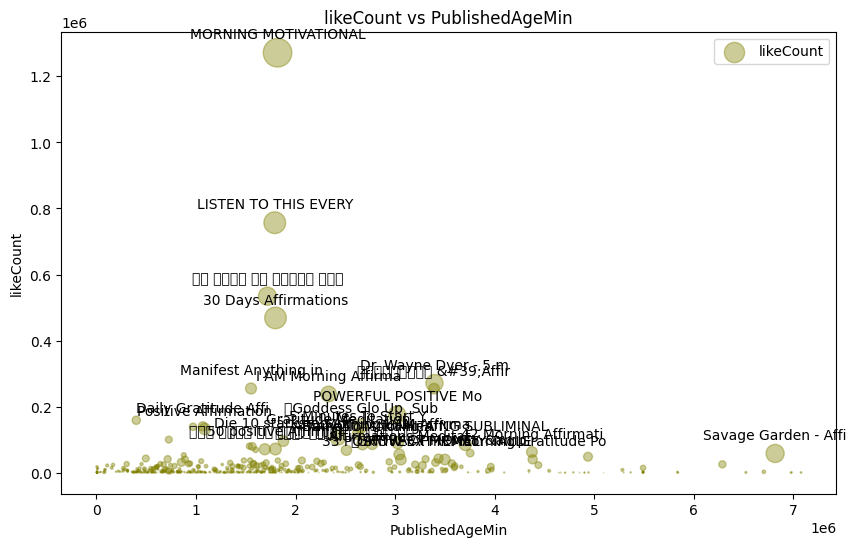

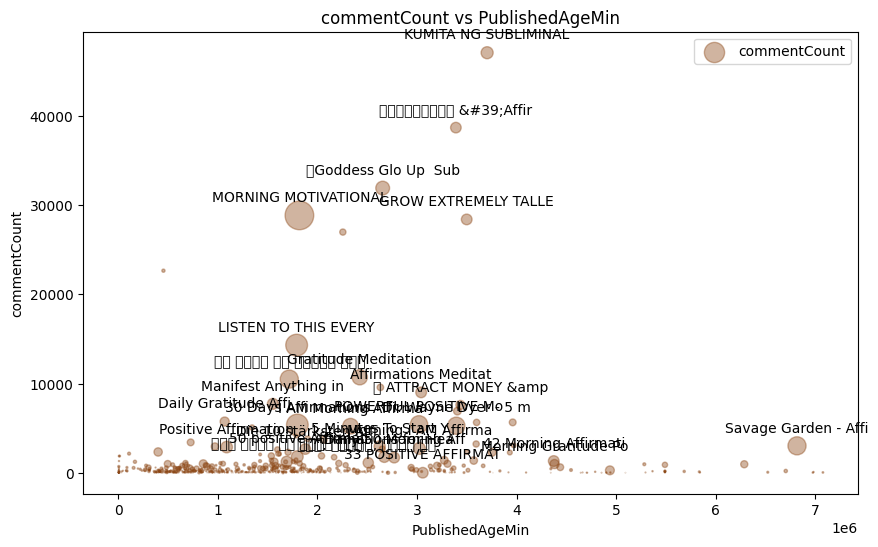

In [50]:

# Define colors and opacities
colors = {'viewCount': 'gold', 'likeCount': 'olive', 'commentCount': 'saddlebrown'}
opacities = {'viewCount': 0.4, 'likeCount': 0.4, 'commentCount': 0.4}

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Generate separate scatter plots for likeCount and commentCount, varying size based on viewCount
for col in ['likeCount', 'commentCount']:
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(df['PublishedAgeMin'], df[col], s=df['viewCount']/100000, color=colors[col], alpha=opacities[col], label=col)
    plt.xlabel('PublishedAgeMin')
    plt.ylabel(col)
    plt.title(f'{col} vs PublishedAgeMin')

    # Iterate through DataFrame rows for annotation
    for i, row in df.iterrows():
        if row['viewCount'] > view_count_threshold:
            plt.annotate(row['title'][:20], (row['PublishedAgeMin'], row[col]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.legend()
    plt.show()

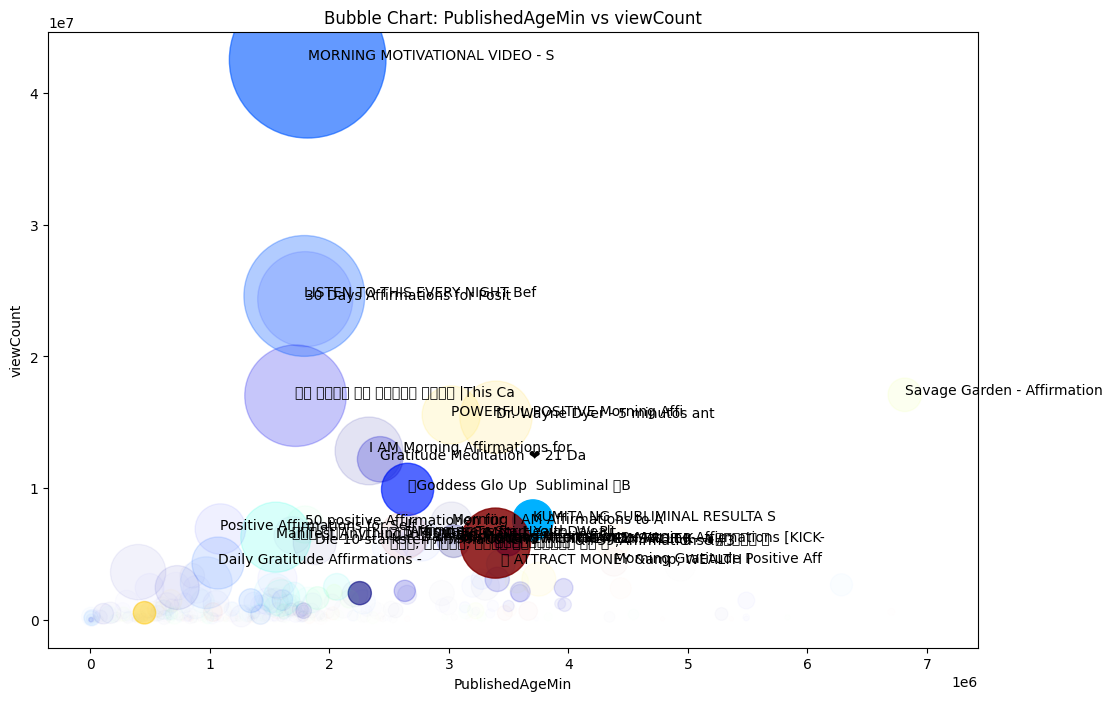

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame and it has 'channelId', 'PublishedAgeMin', 'viewCount', and 'likeCount' columns

# Fill NaN values in 'commentCount' column with 0
df['commentCount'].fillna(0, inplace=True)

# Define opacity based on commentCount
opacity = df['commentCount'] / df['commentCount'].max()

# Map each channelId to a unique color
unique_channels = df['channelId'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(unique_channels)))
color_map = dict(zip(unique_channels, colors))

# Apply the color map to generate a color array for the scatter plot
scatter_colors = df['channelId'].map(color_map)

# Determine the threshold for viewCount to be considered for annotation
view_count_threshold = df['viewCount'].max() * 0.1

# Create the bubble chart
plt.figure(figsize=(12, 8))
bubble = plt.scatter(df['PublishedAgeMin'], df['viewCount'], s=df['likeCount']/100, c=scatter_colors, alpha=opacity)
plt.ylabel('viewCount')
plt.xlabel('PublishedAgeMin')
plt.title('Bubble Chart: PublishedAgeMin vs viewCount')

# Annotate the plot with the first 30 characters of the "title" column for viewCounts above 10% of its maximum
for i, txt in enumerate(df['title']):
    if df['viewCount'].iloc[i] > view_count_threshold:
        plt.annotate(txt[:30], (df['PublishedAgeMin'].iloc[i], df['viewCount'].iloc[i]))

plt.show()


In [62]:
# Perform groupby operation on 'channelTitle', aggregate using sum of 'viewCount', 'likeCount', 'commentCount'
# and count the number of 'channelId' occurrences. Calculate 'likeCount' as a percentage of 'viewCount'.
aggregated_df = df.groupby('channelTitle').agg({
    'viewCount': 'sum',
    'likeCount': 'sum',
    'commentCount': 'sum',
    'channelId': 'count'
}).rename(columns={'channelId': 'Number of Videos in this Category'})

# Calculate 'likeCount' as a percentage of 'viewCount'
aggregated_df['likePercentage'] = (aggregated_df['likeCount'] / aggregated_df['viewCount']) * 100
# Calculate 'likeCount' as a percentage of 'viewCount'
aggregated_df['commentPercentage'] = (aggregated_df['commentCount'] / aggregated_df['viewCount']) * 100

# Sort the aggregated dataframe in descending order by 'viewCount'
sorted_aggregated_df = aggregated_df.sort_values(by='viewCount', ascending=False)


sorted_aggregated_df.head(15)


,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
Sandeep Maheshwari,74256247,2308162.0,51818.0,4,3.108374,0.069783
JeetFix,34773686,697426.0,9897.0,8,2.005614,0.028461
Bob Baker Affirmations,28837651,440923.0,41784.0,29,1.528984,0.144894
AKUO,23028805,189315.0,69675.0,10,0.822079,0.302556
GVG Motivation,22562750,314813.0,6527.0,8,1.395278,0.028928
Deepak Daiya,18719281,592403.0,12618.0,5,3.164667,0.067406
SavageGardenVEVO,17086513,58319.0,3015.0,1,0.341316,0.017645
Spiritual Mind,16123922,280270.0,5545.0,2,1.738225,0.034390
Jason Stephenson - Sleep Meditation Music,15552803,175629.0,5427.0,1,1.129243,0.034894


In [63]:
sorted_aggregated_df.tail(15)


,viewCount,likeCount,commentCount,Number of Videos in this Category,likePercentage,commentPercentage
channelTitle,,,,,,
The Motivation Radio,10,1.0,0.0,1,10.000000,0.000000
Inner Peace,10,0.0,0.0,1,0.000000,0.000000
@Rich To Success,8,0.0,0.0,1,0.000000,0.000000
The Gate of happiness,7,4.0,0.0,1,57.142857,0.000000
J's Soul Food Hub,7,1.0,0.0,1,14.285714,0.000000
Masashiku channel,6,1.0,0.0,1,16.666667,0.000000
LUMINAVIBE,6,2.0,2.0,1,33.333333,33.333333
PKG ka Gyan,5,1.0,0.0,1,20.000000,0.000000
Paul's Daily Affirmations,3,1.0,0.0,1,33.333333,0.000000


In [70]:
(aggregated_df['Number of Videos in this Category'] == 1).sum()

272

In [73]:
# Filter channels with only 1 video
single_video_channels_df = aggregated_df[aggregated_df['Number of Videos in this Category'] == 1]

# Sort the single video channels DataFrame by 'viewCount' in descending order
single_video_channels_df = single_video_channels_df.sort_values('viewCount', ascending=False)
single_video_channels_df.head()

In [65]:
df.count()

kind                    608
etag                    608
videoId                 608
publishedAt             608
channelId               608
title                   608
description             595
url                     608
width                   608
height                  608
channelTitle            608
liveBroadcastContent    608
publishTime             608
id                      608
duration                608
dimension               608
definition              608
caption                 608
licensedContent         608
projection              608
uploadStatus            608
privacyStatus           608
license                 608
embeddable              608
publicStatsViewable     608
madeForKids             608
viewCount               608
likeCount               599
favoriteCount           608
commentCount            608
topicCategories         547
PublishedAgeMin         608
viewCountPerMin         608
likeCountPerMin         599
commentCountPerMin      599
color               